# Evaluating stardist hyperparameters

NOTE : use provided env for this notebook.

Evaluates performance on the images generated by `generate_cellpose_hyperparameters.ipynb`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import sys
sys.path.append("../")
from stardist.matching import matching_dataset
from tifffile import imread
from pathlib import Path
import matplotlib.pyplot as plt

from plots import *
from utils import *

SAVE_AS_SVG = True
SAVE_AS_PNG = False

In [3]:
image_path = Path("./stardist_hyperparams_check")
images_path = list(image_path.glob("*.tif"))
images = [imread(str(img)) for img in images_path]
names = []
cellpose_count = 0

for img in images_path:
    if "cellpose" in img.stem:
        # threshold is after _t_ and before _r, can be negative !
        cellpose_count += 1
        NMS = img.stem.split("_nms_")[1].split("_prob")[0]
        thresh = img.stem.split("_prob_")[1]
        name = f"StarDist - Threshold {thresh} - NMS {NMS}" # - Resample {resample}"
        names.append(name)
    else:
        names.append(img.stem)

GT_labels = imread(str(image_path / "gt/visual_labels.tif"))

In [4]:
taus = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


model_stats = []
names_stats = []

for i, p in enumerate(images):
    print(f"Validating on {names[i]}")
    if len(p.shape) > 3:
        p = p[0].astype(np.uint64)
    stats = [matching_dataset(
        GT_labels, 
        p,
        thresh=t, 
        show_progress=False
        ) for t in taus]
    model_stats.append(stats)
    for t in taus:
        names_stats.append(names[i])
    # uncomment for ALL plots : 
    # plot_performance(taus, stats, name=names[i])
    print("*"*20)

Validating on stardist_nms_0.2_prob_0.1
********************
Validating on stardist_nms_0.2_prob_0.2
********************
Validating on stardist_nms_0.2_prob_0.3
********************
Validating on stardist_nms_0.2_prob_0.4
********************
Validating on stardist_nms_0.2_prob_0.5
********************
Validating on stardist_nms_0.2_prob_0.6
********************
Validating on stardist_nms_0.2_prob_0.7
********************
Validating on stardist_nms_0.2_prob_0.8
********************
Validating on stardist_nms_0.2_prob_0.9
********************
Validating on stardist_nms_0.2_prob_1.0
********************
Validating on stardist_nms_0.3_prob_0.1
********************
Validating on stardist_nms_0.3_prob_0.2
********************
Validating on stardist_nms_0.3_prob_0.3
********************
Validating on stardist_nms_0.3_prob_0.4
********************
Validating on stardist_nms_0.3_prob_0.5
********************
Validating on stardist_nms_0.3_prob_0.6
********************
Validating on stardist_n

In [5]:
dfs = [dataset_matching_stats_to_df(s) for s in model_stats]
df = pd.concat(dfs)
df["Params"] = names_stats
df

,criterion,fp,tp,fn,precision,recall,accuracy,f1,n_true,n_pred,mean_true_score,mean_matched_score,panoptic_quality,by_image,Params
thresh,,,,,,,,,,,,,,,
0.1,iou,2741,3169,216,0.536210,0.936189,0.517303,0.681872,3385,5910,0.307480,0.328438,0.223953,False,stardist_nms_0.2_prob_0.1
0.2,iou,3126,2784,601,0.471066,0.822452,0.427584,0.599032,3385,5910,0.288920,0.351292,0.210435,False,stardist_nms_0.2_prob_0.1
0.3,iou,4138,1772,1613,0.299831,0.523486,0.235544,0.381280,3385,5910,0.214658,0.410056,0.156346,False,stardist_nms_0.2_prob_0.1
0.4,iou,5110,800,2585,0.135364,0.236337,0.094173,0.172136,3385,5910,0.115650,0.489342,0.084233,False,stardist_nms_0.2_prob_0.1
0.5,iou,5610,300,3085,0.050761,0.088626,0.033352,0.064551,3385,5910,0.051471,0.580768,0.037489,False,stardist_nms_0.2_prob_0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.5,iou,0,0,3385,0.000000,0.000000,0.000000,0.000000,3385,0,0.000000,0.000000,0.000000,False,stardist_nms_0.4_prob_1.0
0.6,iou,0,0,3385,0.000000,0.000000,0.000000,0.000000,3385,0,0.000000,0.000000,0.000000,False,stardist_nms_0.4_prob_1.0
0.7,iou,0,0,3385,0.000000,0.000000,0.000000,0.000000,3385,0,0.000000,0.000000,0.000000,False,stardist_nms_0.4_prob_1.0


In [6]:
df.sort_values(by="f1", ascending=False)

,criterion,fp,tp,fn,precision,recall,accuracy,f1,n_true,n_pred,mean_true_score,mean_matched_score,panoptic_quality,by_image,Params
thresh,,,,,,,,,,,,,,,
0.1,iou,1677,2973,412,0.639355,0.878287,0.587317,0.740012,3385,4650,0.279112,0.317791,0.235170,False,stardist_nms_0.4_prob_0.7
0.1,iou,1524,2868,517,0.653005,0.847267,0.584233,0.737559,3385,4392,0.268874,0.317343,0.234059,False,stardist_nms_0.4_prob_0.8
0.1,iou,1626,2924,461,0.642637,0.863811,0.583516,0.736988,3385,4550,0.275356,0.318769,0.234929,False,stardist_nms_0.3_prob_0.7
0.1,iou,1586,2883,502,0.645111,0.851699,0.579964,0.734148,3385,4469,0.272440,0.319879,0.234838,False,stardist_nms_0.2_prob_0.7
0.1,iou,1863,3036,349,0.619718,0.896898,0.578506,0.732979,3385,4899,0.287000,0.319992,0.234547,False,stardist_nms_0.4_prob_0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.6,iou,0,0,3385,0.000000,0.000000,0.000000,0.000000,3385,0,0.000000,0.000000,0.000000,False,stardist_nms_0.3_prob_1.0
0.7,iou,0,0,3385,0.000000,0.000000,0.000000,0.000000,3385,0,0.000000,0.000000,0.000000,False,stardist_nms_0.3_prob_1.0
0.8,iou,0,0,3385,0.000000,0.000000,0.000000,0.000000,3385,0,0.000000,0.000000,0.000000,False,stardist_nms_0.3_prob_1.0


In [7]:
# get cellpose_count first color of tab20 as rgb hex
# sd_color = get_n_shades(COLORMAP[0], n_shades=cellpose_count)
# colormap = sd_color + [COLORMAP[2], COLORMAP[3]]
colormap = "tab20"

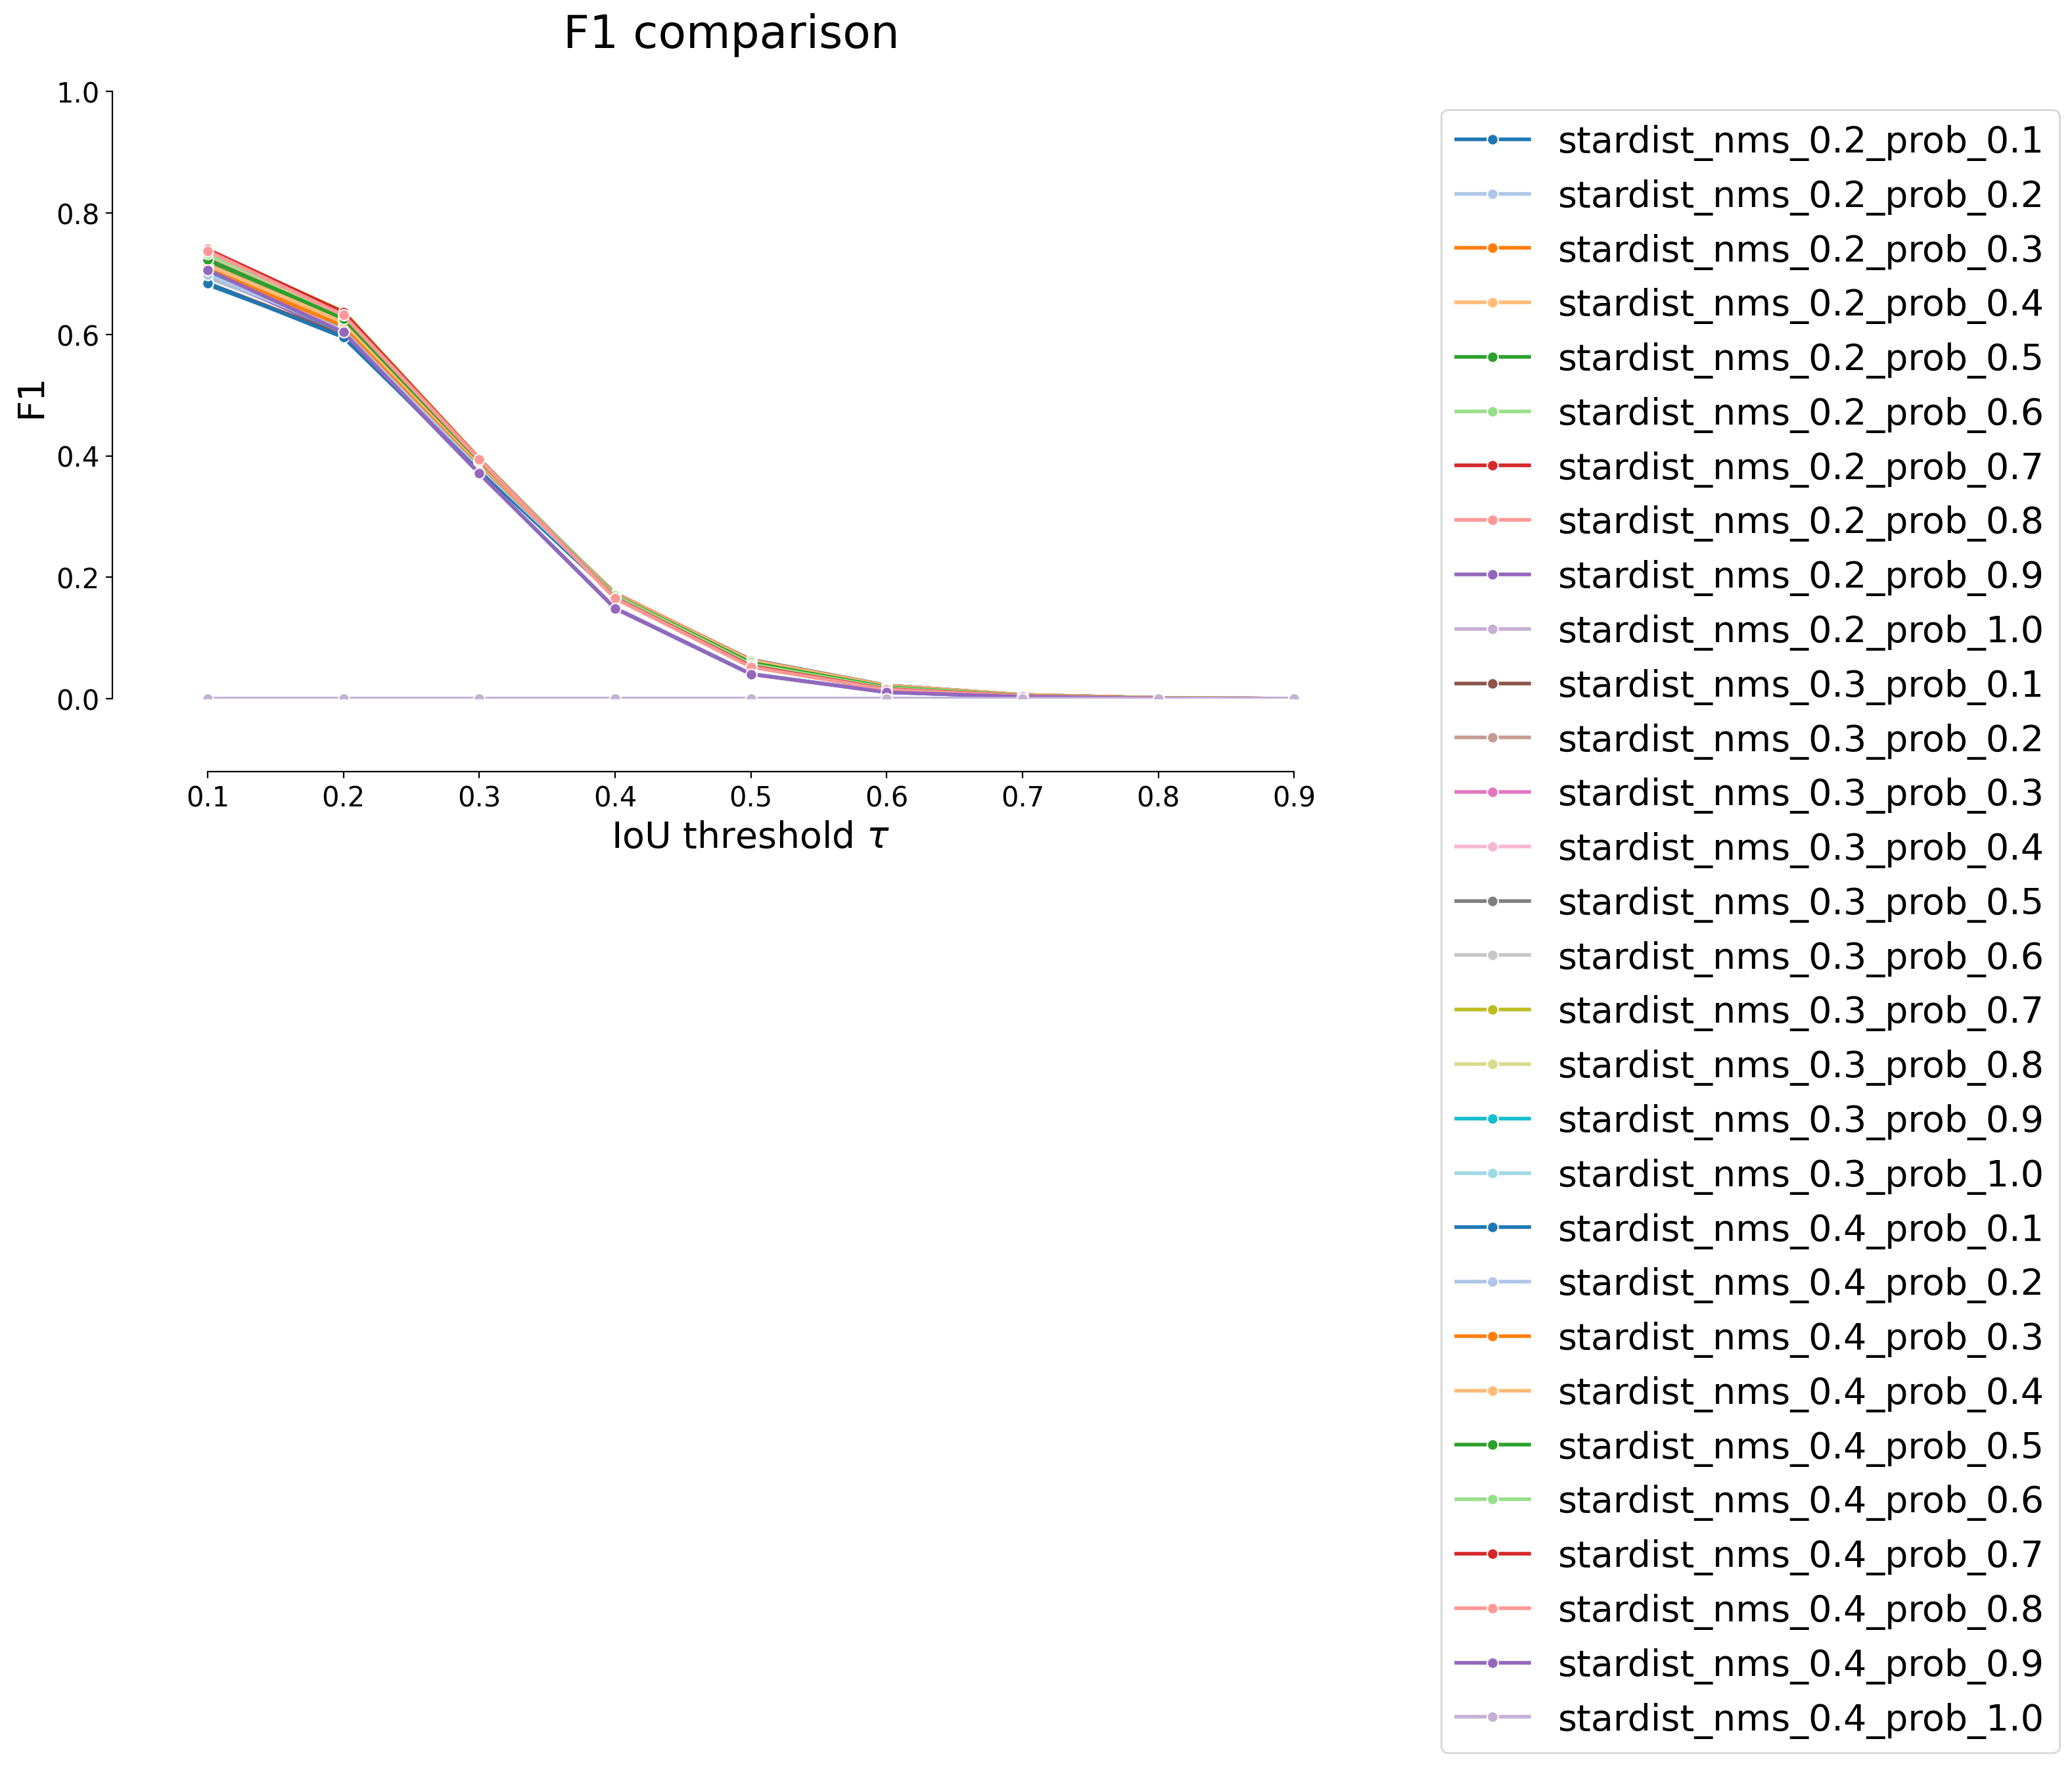

In [8]:
plot_stat_comparison(taus=taus, stats_list=model_stats, model_names=names, metric="IoU", colormap=colormap)
if SAVE_AS_PNG:
    plt.savefig(f"sd_hyperparams_test_iou.png", format="png")
if SAVE_AS_SVG:
    plt.savefig(f"sd_hyperparams_test_iou.svg", format="svg", bbox_inches='tight')